# Nobel Prize Winners Analysis

This dataset list all Nobel laureates (persons and organizations) from 1902. 

One Nobel Laureate may be awarded more than one Nobel Prize.

## EDA

In [30]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train = pd.read_csv('nobel-prize-laureates.csv',sep=';')

## understanding the data

In [32]:
# see information about data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    989 non-null    int64 
 1   Firstname             988 non-null    object
 2   Surname               956 non-null    object
 3   Born                  949 non-null    object
 4   Died                  662 non-null    object
 5   Born country          958 non-null    object
 6   Born country code     958 non-null    object
 7   Born city             956 non-null    object
 8   Died country          650 non-null    object
 9   Died country code     650 non-null    object
 10  Died city             644 non-null    object
 11  Gender                989 non-null    object
 12  Year                  989 non-null    int64 
 13  Category              989 non-null    object
 14  Overall motivation    23 non-null     object
 15  Motivation            989 non-null    ob

In [33]:
# see colunm and rows of data
train.head()

,Id,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,...,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country,Geo Shape,Geo Point 2D
0,820,Leonid,Hurwicz,1917-08-21,2008-06-24,Russia,RU,Moscow,USA,US,...,male,2007,Economics,NaN,"""for having laid the foundations of mechanism ...",University of Minnesota,Minneapolis MN,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
1,28,Robert A.,Millikan,1868-03-22,1953-12-19,USA,US,Morrison IL,USA,US,...,male,1923,Physics,NaN,"""for his work on the elementary charge of elec...",California Institute of Technology (Caltech),Pasadena CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
2,90,Murray,Gell-Mann,1929-09-15,2019-05-24,USA,US,New York NY,USA,US,...,male,1969,Physics,NaN,"""for his contributions and discoveries concern...",California Institute of Technology (Caltech),Pasadena CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
3,562,Carlos Filipe Ximenes,Belo,1948-02-03,NaN,East Timor,TL,Wailacama,NaN,NaN,...,male,1996,Peace,NaN,"""for their work towards a just and peaceful so...",NaN,NaN,NaN,NaN,NaN
4,569,Sully,Prudhomme,1839-03-16,1907-09-07,France,FR,Paris,France,FR,...,male,1901,Literature,NaN,"""in special recognition of his poetic composit...",NaN,NaN,NaN,NaN,NaN


In [34]:
# see shape of data
train.shape

(989, 21)

In [35]:
# see colunms names
train.columns

Index(['Id', 'Firstname', 'Surname', 'Born', 'Died', 'Born country',
       'Born country code', 'Born city', 'Died country', 'Died country code',
       'Died city', 'Gender', 'Year', 'Category', 'Overall motivation',
       'Motivation', 'Organization name', 'Organization city',
       'Organization country', 'Geo Shape', 'Geo Point 2D'],
      dtype='object')

In [36]:
# see types of colunms
train.dtypes

Id                       int64
Firstname               object
Surname                 object
Born                    object
Died                    object
Born country            object
Born country code       object
Born city               object
Died country            object
Died country code       object
Died city               object
Gender                  object
Year                     int64
Category                object
Overall motivation      object
Motivation              object
Organization name       object
Organization city       object
Organization country    object
Geo Shape               object
Geo Point 2D            object
dtype: object

In [37]:
## see unquies values
train.nunique()

Id                      981
Firstname               751
Surname                 898
Born                    930
Died                    650
Born country            126
Born country code        81
Born city               644
Died country             52
Died country code        46
Died city               318
Gender                    3
Year                    119
Category                  6
Overall motivation        9
Motivation              684
Organization name       318
Organization city       189
Organization country     29
Geo Shape                26
Geo Point 2D             26
dtype: int64

In [38]:
# see values counnts
print('Gender:',train.Gender.value_counts(),'Category:',train.Category.value_counts(),sep='\n')

Gender:
male      898
female     61
org        30
Name: Gender, dtype: int64
Category:
Medicine      225
Physics       222
Chemistry     191
Peace         140
Literature    119
Economics      92
Name: Category, dtype: int64


## Data Cleaning

In [39]:
# see Missing Values
train.isnull()

,Id,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,...,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country,Geo Shape,Geo Point 2D
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,True,True,...,False,False,False,True,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
985,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [40]:
## see Missing Values
train.isnull().sum()

Id                        0
Firstname                 1
Surname                  33
Born                     40
Died                    327
Born country             31
Born country code        31
Born city                33
Died country            339
Died country code       339
Died city               345
Gender                    0
Year                      0
Category                  0
Overall motivation      966
Motivation                0
Organization name       262
Organization city       267
Organization country    265
Geo Shape               358
Geo Point 2D            358
dtype: int64

In [41]:
# drop useless columns
train.drop(['Id','Firstname','Surname','Motivation','Overall motivation','Born country code','Died country code','Born city','Died city'
            ,'Organization name','Organization city','Organization country','Geo Shape','Geo Point 2D'],axis=1,inplace=True)

In [42]:
# rename columns
train.rename(columns={'Born country':'Born_Country','Died country':'Died_Country'},inplace=True)

In [43]:
train.columns

Index(['Born', 'Died', 'Born_Country', 'Died_Country', 'Gender', 'Year',
       'Category'],
      dtype='object')

In [44]:
# replace Died Year to use
train['Died'].replace(np.nan,0,inplace=True)

In [45]:
# fun uses in  Alive colum
def liv(x):
    if x == 0:
        return 1
    else:
        return 0

In [46]:
# create Alive column
train['Alive'] = train['Died'].apply(liv)
train['Alive'].value_counts() 

0    662
1    327
Name: Alive, dtype: int64

In [47]:
# covert some colunm to data time series
train['Born'] = pd.to_datetime(train.Born)
train['Died'] = pd.to_datetime(train.Died)
train['Year'] = train.Year.astype(int)

In [48]:
train['Born_Year'] = train.Born.dt.year
train['Born_Month'] = train.Born.dt.month
train['Died_Year'] = train.Died.dt.year
train['Died_Month'] = train.Died.dt.month
train.drop(['Born','Died'],axis=1,inplace=True)

In [49]:
train

,Born_Country,Died_Country,Gender,Year,Category,Alive,Born_Year,Born_Month,Died_Year,Died_Month
0,Russia,USA,male,2007,Economics,0,1917.0,8.0,2008,6
1,USA,USA,male,1923,Physics,0,1868.0,3.0,1953,12
2,USA,USA,male,1969,Physics,0,1929.0,9.0,2019,5
3,East Timor,NaN,male,1996,Peace,1,1948.0,2.0,1970,1
4,France,France,male,1901,Literature,0,1839.0,3.0,1907,9
...,...,...,...,...,...,...,...,...,...,...
984,USA,USA,male,2002,Chemistry,0,1917.0,6.0,2010,12
985,USSR (now Russia),NaN,male,2003,Physics,0,1928.0,6.0,2017,3
986,USA,USA,male,2005,Physics,0,1925.0,9.0,2018,12
987,Belgium,France,male,2005,Chemistry,0,1930.0,10.0,2015,1


## Visualiziton of Data

### Gender

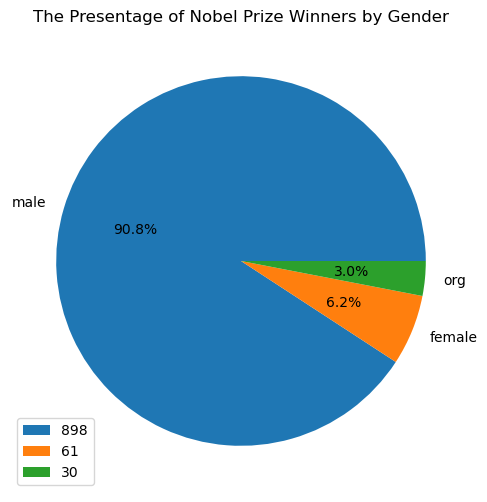

In [50]:
labels = train['Gender'].unique()
size = train['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(size,labels=labels,autopct='%1.1f%%',startangle=0)
plt.legend(train['Gender'].value_counts(),loc = 'lower left')
plt.title('The Presentage of Nobel Prize Winners by Gender')
plt.show()

### Category

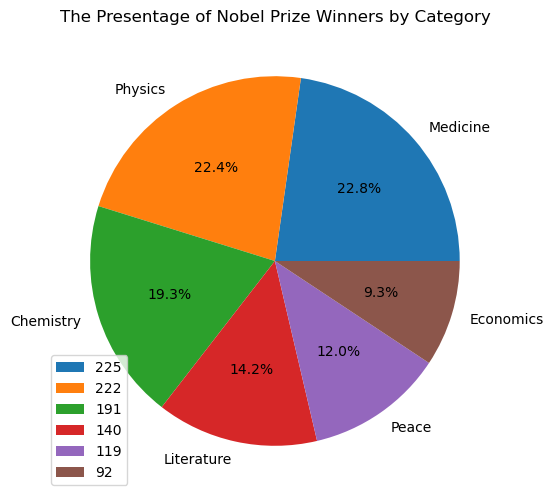

In [51]:
labels = ['Medicine','Physics', 'Chemistry','Literature','Peace', 'Economics']
size = train.Category.value_counts()
plt.figure(figsize=(6,6))
plt.pie(size,labels=labels,autopct='%1.1f%%',startangle=0)
plt.legend(train.Category.value_counts(),loc = 'lower left')
plt.title('The Presentage of Nobel Prize Winners by Category')
plt.show()

### Alive

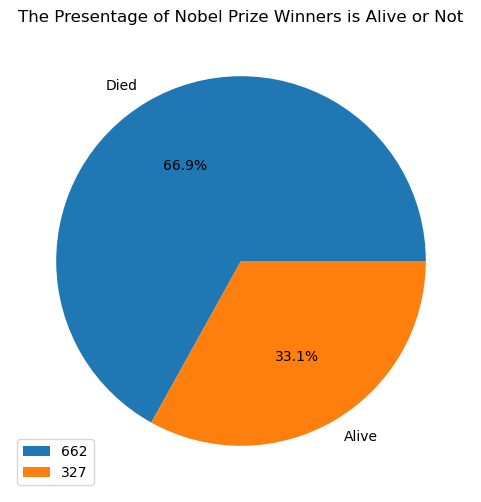

In [52]:
labels = ['Died','Alive']
size = train.Alive.value_counts()
plt.figure(figsize=(6,6))
plt.pie(size,labels=labels,autopct='%1.1f%%',startangle=0)
plt.legend(train.Alive.value_counts(),loc = 'lower left')
plt.title('The Presentage of Nobel Prize Winners is Alive or Not')
plt.show()

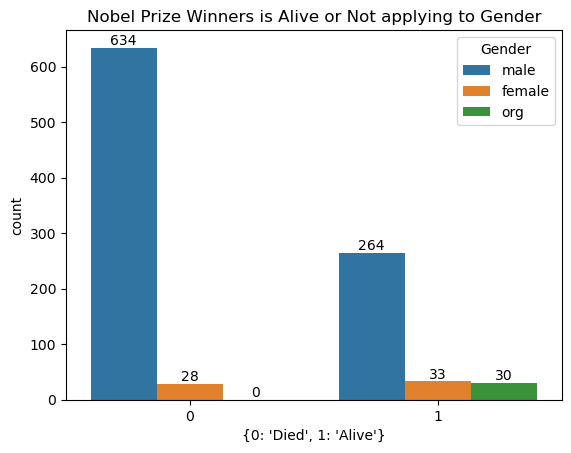

In [53]:
ax = sns.countplot(train,x='Alive',hue='Gender')
ax.bar_label(ax.containers[0],label_type='edge')
ax.bar_label(ax.containers[1],label_type='edge')
ax.bar_label(ax.containers[2],label_type='edge')
plt.title('Nobel Prize Winners is Alive or Not applying to Gender')
plt.xlabel({0:'Died',1:'Alive'})
plt.show()

### Month

#### Born Month

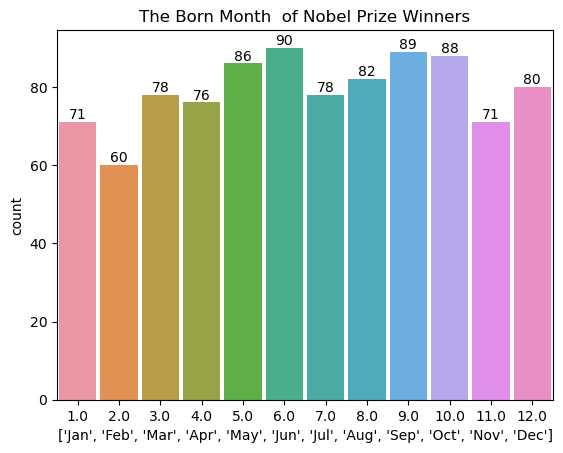

In [54]:
ax =sns.countplot(train,x='Born_Month',width=.9)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('The Born Month  of Nobel Prize Winners')
plt.show()

#### Died Month

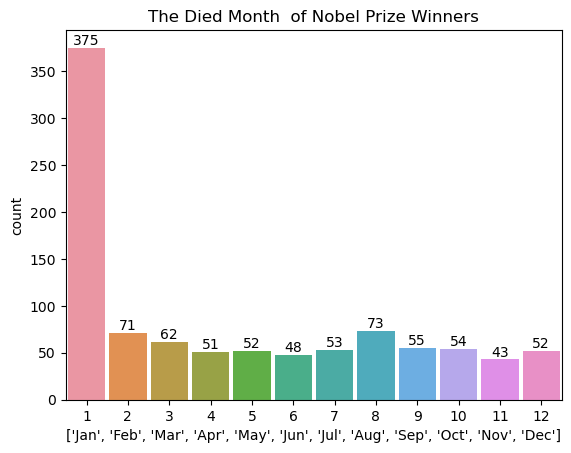

In [55]:
ax = sns.countplot(train,x='Died_Month',width=.9)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('The Died Month  of Nobel Prize Winners')
plt.show()

### Country

#### Born Country

In [56]:
#  10 top of countries for Nobel winner Born
train['Born_Country'].value_counts().nlargest(n=10)

USA                289
United Kingdom      90
Germany             67
France              56
Sweden              30
Japan               28
Canada              21
Switzerland         19
the Netherlands     19
Italy               18
Name: Born_Country, dtype: int64

#### Died Country

In [57]:
#  10 top of countries for Nobel winner Died
train['Died_Country'].value_counts().nlargest(n=10)

USA                           238
United Kingdom                 77
France                         53
Germany                        36
Sweden                         29
Switzerland                    29
West Germany (now Germany)     23
Italy                          15
Japan                          11
Spain                          10
Name: Died_Country, dtype: int64

### Year

In [58]:
#  10 top of Years to won a Nobel Prize for Nobel winner 
train['Year'].value_counts().nlargest(n=10)

2001    15
2019    14
2022    14
2014    13
1996    13
2011    13
2013    13
2002    13
2018    13
2009    13
Name: Year, dtype: int64